
# **Homework 2 - Implementing a CNN for CIFAR-10 dataset**


##**Part1 - implemention of a basic convolutional neural network**

##Importing needed libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##loading dataset

In [3]:
(X_trainData, Y_trainData), (X_testData, Y_testData) = tf.keras.datasets.cifar10.load_data()

##Reshape dataset
###convert labels to one-hot encoding

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
cat_y_trainData = to_categorical(Y_trainData, num_classes=10)
cat_y_testData = to_categorical(Y_testData, num_classes=10)

##Normalization
between 0 , 1 and float32

In [6]:
X_trainData = X_trainData.astype(np.float32) / 255.0
X_testData = X_testData.astype(np.float32) / 255.0

##Creat our basic CNN model with stacking convelution and pooling layer
###importing layers and models

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, MaxPool2D, Conv2D, Flatten, GlobalAveragePooling2D, ReLU, Activation

###creating the model

In [12]:
input = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPool2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(units=128)(x)
x = ReLU()(x)

x = Dense(units=10)(x)
predictions = Activation(activation='softmax')(x)


our_CNN_model = Model(input, predictions)

###print summary

In [8]:
our_CNN_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

##Compile the model with optimizer and loss function


In [9]:
our_CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Train the model 

In [11]:
our_CNN_model.fit(x=X_trainData, y=cat_y_trainData, epochs=35, batch_size=32,
              validation_data=(X_testData, cat_y_testData))

Epoch 1/35
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5774 - accuracy: 0.7987 - val_loss: 0.7502 - val_accuracy: 0.7504
Epoch 2/35
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5058 - accuracy: 0.8207 - val_loss: 0.7140 - val_accuracy: 0.7621
Epoch 3/35
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4547 - accuracy: 0.8395 - val_loss: 0.7264 - val_accuracy: 0.7653
Epoch 4/35
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4033 - accuracy: 0.8581 - val_loss: 0.7320 - val_accuracy: 0.7683
Epoch 5/35
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3726 - accuracy: 0.8688 - val_loss: 0.7732 - val_accuracy: 0.7644
Epoch 6/35
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3430 - accuracy: 0.8766 - val_loss: 0.8068 - val_accuracy: 0.7651
Epoch 7/35
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3132 - accuracy: 0.8892 - val_loss: 0.8022 - val_accu

###plot model loss history

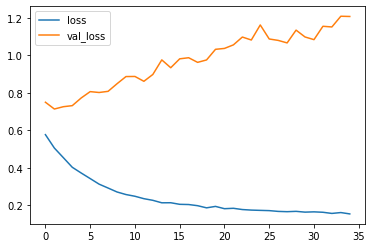

In [12]:
plot_history = pd.DataFrame(our_CNN_model.history.history)
plot_history[['loss', 'val_loss']].plot()

###min of loss history

In [13]:
np.min(our_CNN_model.history.history['loss'])

0.15448826551437378

###plot model accuracy

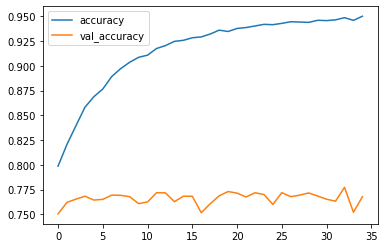

In [14]:
plot_history = pd.DataFrame(our_CNN_model.history.history)
plot_history[['accuracy', 'val_accuracy']].plot()

###max of validation accuracy

In [15]:
np.max(our_CNN_model.history.history['val_accuracy'])

0.7773000001907349

##Evalute the model

In [16]:
our_CNN_model.evaluate(X_testData, cat_y_testData)

313/313 [==============================] - 1s 4ms/step - loss: 1.2077 - accuracy: 0.7678


[1.2077003717422485, 0.767799973487854]

##**Part2 - check the effect of layer's depth on the resalut**




###We use more hidden layers and GlobalArrangePooling

In [21]:
input = Input(shape=(32, 32, 3))

x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same')(input)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x) 

 
x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x) 

x = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x) 

x = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding='same')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x) 

#globalaveragepooling
x = GlobalAveragePooling2D()(x)

x = Dense(units=128)(x)
x = ReLU()(x)

x = Dense(units=32)(x)
x = ReLU()(x)
x = Dense(units=10)(x)
predictions = Activation(activation='softmax')(x)


our_CNN_model2 = Model(input, predictions)

##Getting a summary


In [22]:
our_CNN_model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 re_lu_2 (ReLU)              (None, 16, 16, 64)        0         
                                                           

##compile and training the model

In [23]:
our_CNN_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
our_CNN_model2.fit(x=X_trainData, y=cat_y_trainData, epochs=50, batch_size=32, validation_data=(X_testData, cat_y_testData))

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5562 - accuracy: 0.4194 - val_loss: 1.1465 - val_accuracy: 0.5885
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0516 - accuracy: 0.6266 - val_loss: 0.9858 - val_accuracy: 0.6554
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8297 - accuracy: 0.7104 - val_loss: 0.8603 - val_accuracy: 0.7035
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6944 - accuracy: 0.7584 - val_loss: 0.8427 - val_accuracy: 0.7255
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5932 - accuracy: 0.7913 - val_loss: 0.8069 - val_accuracy: 0.7285
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5053 - accuracy: 0.8221 - val_loss: 0.8228 - val_accuracy: 0.7413
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4203 - accuracy: 0.8542 - val_loss: 0.8807 - val_ac

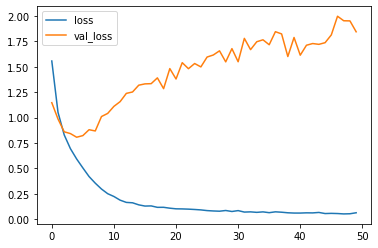

In [24]:
plot_history = pd.DataFrame(our_CNN_model2.history.history)
plot_history[['loss', 'val_loss']].plot()

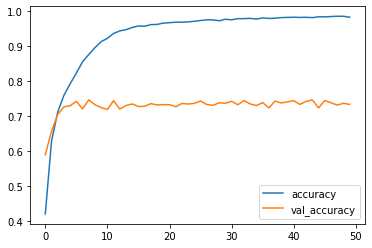

In [25]:
plot_history[['accuracy', 'val_accuracy']].plot()


##Evalute the model

In [26]:
our_CNN_model2.evaluate(X_testData, cat_y_testData)

313/313 [==============================] - 1s 4ms/step - loss: 1.8434 - accuracy: 0.7324


[1.8434138298034668, 0.7324000000953674]

##**Part3 - check the early-stoping technic to raech an optimum model**


###use early-stoping in our model
###to reach a fewer loss and a better accuracy

In [8]:
from tensorflow.keras.callbacks import EarlyStopping


In [9]:
early_stoping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

In [13]:
our_CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
our_CNN_model.fit(x=X_trainData, y=cat_y_trainData, epochs=40, batch_size=32,
              validation_data=(X_testData, cat_y_testData), callbacks=[early_stoping])

Epoch 1/40
1563/1563 [==============================] - 13s 7ms/step - loss: 1.4843 - accuracy: 0.4553 - val_loss: 1.0891 - val_accuracy: 0.6037
Epoch 2/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9856 - accuracy: 0.6503 - val_loss: 0.9061 - val_accuracy: 0.6775
Epoch 3/40
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7936 - accuracy: 0.7194 - val_loss: 0.7644 - val_accuracy: 0.7370
Epoch 4/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6757 - accuracy: 0.7618 - val_loss: 0.7111 - val_accuracy: 0.7538
Epoch 5/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5926 - accuracy: 0.7930 - val_loss: 0.6938 - val_accuracy: 0.7654
Epoch 6/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5276 - accuracy: 0.8147 - val_loss: 0.6829 - val_accuracy: 0.7711
Epoch 7/40
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4705 - accuracy: 0.8338 - val_loss: 0.7276 - val_accurac

###plot model loss history

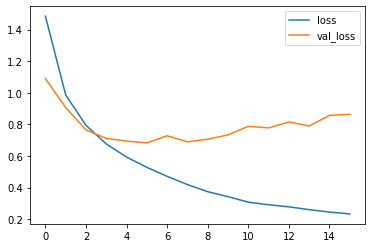

In [14]:
plot_history = pd.DataFrame(our_CNN_model.history.history)
plot_history[['loss', 'val_loss']].plot()

###min of loss history

In [15]:
np.min(our_CNN_model.history.history['loss'])

0.23287376761436462

###plot model accuracy

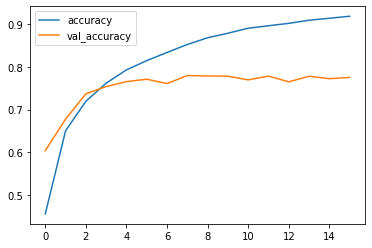

In [16]:
plot_history = pd.DataFrame(our_CNN_model.history.history)
plot_history[['accuracy', 'val_accuracy']].plot()

###max of validation accuracy

In [17]:
np.max(our_CNN_model.history.history['val_accuracy'])

0.779699981212616

##Evalute the model

In [18]:
our_CNN_model.evaluate(X_testData, cat_y_testData)

313/313 [==============================] - 1s 4ms/step - loss: 0.6829 - accuracy: 0.7711


[0.682878851890564, 0.7710999846458435]

###confusion matrix and classification report

### should be sparse

In [19]:
predictions = our_CNN_model.predict(X_testData)
predictions_sparse = np.argmax(predictions, axis=1)
predictions[0], predictions_sparse[0]

313/313 [==============================] - 1s 2ms/step


(array([1.4575123e-03, 4.9356726e-04, 4.6526126e-04, 8.7052953e-01,
        2.1654585e-05, 1.1634006e-01, 3.9997026e-03, 1.8319597e-03,
        4.5076455e-03, 3.5320688e-04], dtype=float32), 3)

###printing classification report

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(classification_report(Y_testData, predictions_sparse))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1000
           1       0.86      0.91      0.88      1000
           2       0.72      0.62      0.67      1000
           3       0.60      0.65      0.62      1000
           4       0.68      0.80      0.74      1000
           5       0.78      0.58      0.67      1000
           6       0.86      0.76      0.81      1000
           7       0.76      0.85      0.80      1000
           8       0.90      0.83      0.87      1000
           9       0.84      0.87      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



###use cinfusion matrix

In [22]:
confusion_matrix(Y_testData, predictions_sparse)

array([[843,  20,  27,  14,  19,   0,   0,  13,  38,  26],
       [ 10, 914,   1,   1,   2,   1,   5,   1,  15,  50],
       [ 97,   5, 620,  50,  93,  37,  48,  31,   7,  12],
       [ 25,   9,  49, 650,  77,  76,  34,  56,   7,  17],
       [ 18,   1,  44,  44, 799,  11,  20,  54,   3,   6],
       [ 14,   4,  46, 199,  54, 579,  10,  89,   3,   2],
       [ 11,   4,  38,  83,  74,  16, 756,   8,   5,   5],
       [ 15,   4,  22,  28,  46,  16,   1, 849,   2,  17],
       [ 68,  40,  11,  11,   4,   1,   1,   5, 835,  24],
       [ 27,  66,   4,   9,   5,   4,   1,   8,  10, 866]])

##**Part4 - using dropout layer and batch normalization to report its effect**


###Import dropout layer 

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, MaxPool2D
from tensorflow.keras.layers import Conv2D, Flatten, GlobalAveragePooling2D, ReLU, Activation, BatchNormalization

###Create the model using dropout layer

In [24]:
input = Input(shape=(32, 32, 3))

x = Conv2D(filters=32, kernel_size=(5, 5), strides=1, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)

x = Flatten()(x)

x = Dense(units=128)(x)
x = ReLU()(x)
x = Dropout(0.3)(x)
x = Dense(units=10)(x)
predictions = Activation(activation='softmax')(x)

our_CNN_model3 = Model(input, predictions)


###summary of the model

In [25]:
our_CNN_model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        1849

###compile the model with optimizer 

In [26]:
our_CNN_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Train the model using early stoping

In [27]:
our_CNN_model3.fit(x=X_trainData, y=cat_y_trainData, epochs=40, batch_size=32,
              validation_data=(X_testData, cat_y_testData), callbacks=[early_stoping])

Epoch 1/40
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6155 - accuracy: 0.3962 - val_loss: 1.3927 - val_accuracy: 0.4909
Epoch 2/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3231 - accuracy: 0.5084 - val_loss: 1.2277 - val_accuracy: 0.5673
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2022 - accuracy: 0.5578 - val_loss: 1.2119 - val_accuracy: 0.5672
Epoch 4/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1183 - accuracy: 0.5869 - val_loss: 1.0542 - val_accuracy: 0.6363
Epoch 5/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0417 - accuracy: 0.6198 - val_loss: 1.1261 - val_accuracy: 0.6209
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9661 - accuracy: 0.6481 - val_loss: 1.2665 - val_accuracy: 0.5805
Epoch 7/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9125 - accuracy: 0.6642 - val_loss: 1.1435 - val_accuracy

###loss function and accuracy metric

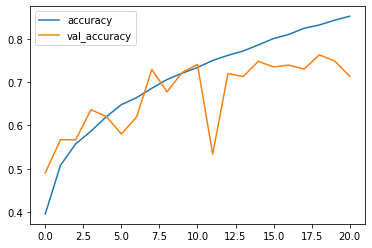

In [28]:
plot_history3 = pd.DataFrame(our_CNN_model3.history.history)
plot_history3[['accuracy', 'val_accuracy']].plot()

###plot model loss history

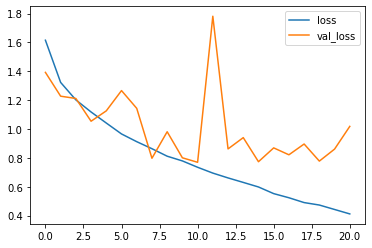

In [29]:
plot_history3[['loss', 'val_loss']].plot()

##Evalute the data

In [30]:
our_CNN_model3.evaluate(X_testData, cat_y_testData)

313/313 [==============================] - 1s 3ms/step - loss: 0.7697 - accuracy: 0.7407


[0.7697134017944336, 0.7407000064849854]

##**Part5 - using some portion of data**


In [51]:
X_trainData = X_trainData[:40000]
X_trainData.shape

(10000, 32, 32, 3)

In [52]:
Y_trainData = Y_trainData[:40000]
Y_trainData.shape

(10000, 1)

In [53]:
cat_y_trainData = cat_y_trainData[0:40000]
cat_y_trainData.shape

(10000, 10)

In [54]:
our_CNN_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
our_CNN_model3.fit(x=X_trainData, y=cat_y_trainData, epochs=40, batch_size=32,
              validation_data=(X_testData, cat_y_testData), callbacks=[early_stoping])

Epoch 1/40
313/313 [==============================] - 3s 8ms/step - loss: 0.4471 - accuracy: 0.8349 - val_loss: 0.8529 - val_accuracy: 0.7378
Epoch 2/40
313/313 [==============================] - 2s 7ms/step - loss: 0.4158 - accuracy: 0.8478 - val_loss: 0.8772 - val_accuracy: 0.7377
Epoch 3/40
313/313 [==============================] - 3s 9ms/step - loss: 0.3825 - accuracy: 0.8603 - val_loss: 0.9930 - val_accuracy: 0.7237
Epoch 4/40
313/313 [==============================] - 2s 7ms/step - loss: 0.3728 - accuracy: 0.8621 - val_loss: 0.9829 - val_accuracy: 0.7329
Epoch 5/40
313/313 [==============================] - 3s 9ms/step - loss: 0.3307 - accuracy: 0.8800 - val_loss: 1.1707 - val_accuracy: 0.7043
Epoch 6/40
313/313 [==============================] - 2s 7ms/step - loss: 0.3248 - accuracy: 0.8806 - val_loss: 1.0778 - val_accuracy: 0.7242
Epoch 7/40
313/313 [==============================] - 2s 7ms/step - loss: 0.3042 - accuracy: 0.8882 - val_loss: 1.2034 - val_accuracy: 0.6868
Epoch 

###loss function and accuracy metric

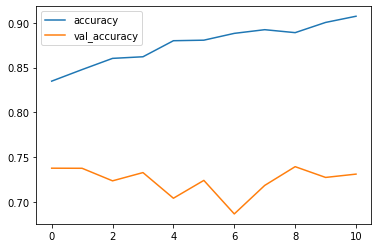

In [56]:
plot_history3 = pd.DataFrame(our_CNN_model3.history.history)
plot_history3[['accuracy', 'val_accuracy']].plot()

###plot model loss history

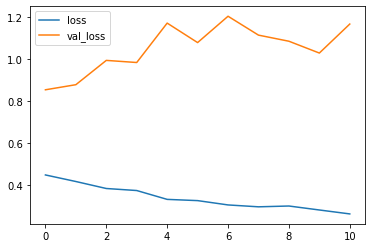

In [57]:
plot_history3[['loss', 'val_loss']].plot()

##Evalute the data

In [58]:
our_CNN_model3.evaluate(X_testData, cat_y_testData)

313/313 [==============================] - 1s 3ms/step - loss: 0.8529 - accuracy: 0.7378


[0.8528999090194702, 0.7378000020980835]